## Question 1: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf
import pandas as pd

# Step 3: Download Tesla stock data
tesla_data = yf.download('TSLA')

# Step 4: Reset the index
tesla_data.reset_index(inplace=True)

# Step 5: Display the first five rows
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch HTML Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Parse HTML Data
soup = BeautifulSoup(html_data, "html5lib")

# Find the Relevant Table
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Check if relevant table was found
if relevant_table is None:
    print("Relevant table not found")
else:
    # Extract Data and Create DataFrame
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    for row in relevant_table.find('tbody').find_all('tr'):
        col = row.find_all('td')
        date = col[0].text
        revenue = col[1].text.replace('$', '').replace(',', '')
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

    # Convert the Revenue column to numeric type
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

    # Display the Last Five Rows
    print(tesla_revenue.tail())


Relevant table not found


## Question 3: Use yfinance to Extract Stock Data

In [5]:
import yfinance as yf

# Download stock data for GameStop (GME)
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683251  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662209   6892800


## Question 4: Use Webscraping to Extract GME Revenue Data

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the HTML content of the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the relevant table
tables = soup.find_all("table")
relevant_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Ensure the relevant table was found
if relevant_table is None:
    print("Relevant table not found")
else:
    # Step 4: Extract the data and store it in a pandas dataframe
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in relevant_table.find("tbody").find_all("tr"):
        col = row.find_all("td")
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

    # Step 5: Display the last five rows of the dataframe
    print(gme_revenue.tail())


Relevant table not found


## Question 6: Plot GameStop Stock Graph

[*********************100%***********************]  1 of 1 completed


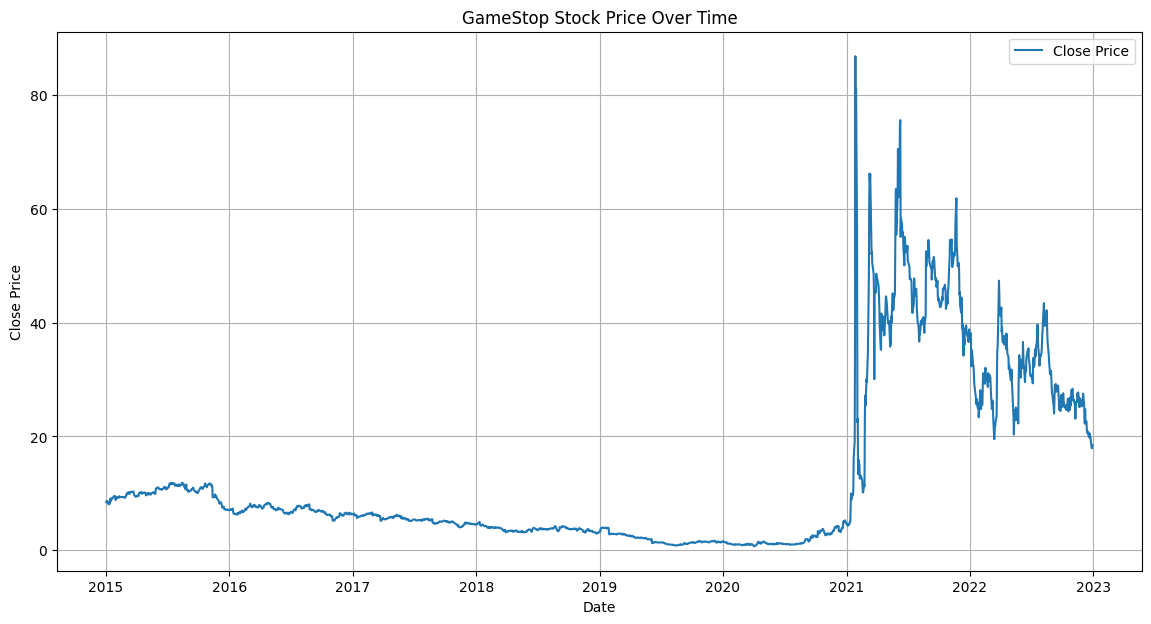

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Extract GameStop stock data
gme_data = yf.download("GME", start="2015-01-01", end="2023-01-01")
gme_data.reset_index(inplace=True)

# Step 2: Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Step 3: Use the make_graph function to plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
